### Data cleansing di Hide

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Uji Statistic

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
### Membuat kolom tanggal acuan data dikumpulkan
df['Observed_Time'] = '2015-02-02'
df['Observed_Time'] = pd.to_datetime(df['Observed_Time'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [6]:
### Membuat kolom umur dari data Year_Birth agar lebih mudah dipahami
df['Age'] = 2015 - df['Year_Birth']

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,2015-02-02,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,2015-02-02,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2015-02-02,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,2015-02-02,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2015-02-02,34


In [8]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan kelahiran

kel=[]
for i in range(len(df)):
    if df['Year_Birth'][i]<1945:
        kel.append('Pre-boomer')
    elif df['Year_Birth'][i]<=1945 or df['Year_Birth'][i]<=1964:
        kel.append('Baby boomer')
    elif df['Year_Birth'][i]<=1965 or df['Year_Birth'][i]<=1980:
        kel.append('Gen X')
    elif df['Year_Birth'][i]<=1981 or df['Year_Birth'][i]<=1996:
        kel.append('Milenial')
    else:
        kel.append('Gen Z')

df['Generation_Types'] = kel

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,2015-02-02,58,Baby boomer
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,2015-02-02,61,Baby boomer
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2015-02-02,50,Gen X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,2015-02-02,31,Milenial
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2015-02-02,34,Milenial


In [10]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan Income

kel = []
for i in range(len(df)):
    if df['Income'][i]<5000:
        kel.append('Poor')
    elif df['Income'][i]<=5001 or df['Income'][i]<=50000:
        kel.append('Lower Middle Class')
    elif df['Income'][i]<=50001 or df['Income'][i]<=70000:
        kel.append('Middle')
    elif df['Income'][i]<=70001 or df['Income'][i]<=100000:
        kel.append('Upper Middle Class')
    else:
        kel.append('Rich')

df['Income_Status'] = kel

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types,Income_Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,2015-02-02,58,Baby boomer,Middle
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,2015-02-02,61,Baby boomer,Lower Middle Class
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,2015-02-02,50,Gen X,Upper Middle Class
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,2015-02-02,31,Milenial,Lower Middle Class
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,2015-02-02,34,Milenial,Middle


In [12]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan Recency

kel = []
for i in range(len(df)):
    if df['Recency'][i]<30:
        kel.append('30 Days')
    elif df['Recency'][i]<=30 or df['Recency'][i]<=60:
        kel.append('60 Days')
    elif df['Recency'][i]<=60 or df['Recency'][i]<=90:
        kel.append('90 Days')
    elif df['Recency'][i]<=90 or df['Recency'][i]<=120:
        kel.append('120 Days')
    
df['LastPurchase'] = kel

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,2015-02-02,58,Baby boomer,Middle,60 Days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2015-02-02,50,Gen X,Upper Middle Class,30 Days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,2015-02-02,31,Milenial,Lower Middle Class,30 Days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2015-02-02,34,Milenial,Middle,120 Days


In [14]:
df['Total_Campaign'] = df['AcceptedCmp1'] +df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Total_Purchase'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['Total_Spending'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,11,1,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,11,0,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,11,0,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,2015-02-02,34,Milenial,Middle,120 Days,0,19,422


In [16]:
col_drop = ['ID','Year_Birth','Z_CostContact','Z_Revenue']
df = df.drop(col_drop, axis=1)

In [17]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,1,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,2015-02-02,34,Milenial,Middle,120 Days,0,19,422


In [18]:
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Observed_Time           0
Age                     0
Generation_Types        0
Income_Status           0
LastPurchase            0
Total_Campaign          0
Total_Purchase          0
Total_Spending          0
dtype: int64

In [19]:
df.dropna(subset=['Income'], inplace=True)

In [20]:
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Observed_Time          0
Age                    0
Generation_Types       0
Income_Status          0
LastPurchase           0
Total_Campaign         0
Total_Purchase         0
Total_Spending         0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2216 non-null   object        
 1   Marital_Status       2216 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2216 non-null   int64         
 4   Teenhome             2216 non-null   int64         
 5   Dt_Customer          2216 non-null   datetime64[ns]
 6   Recency              2216 non-null   int64         
 7   MntWines             2216 non-null   int64         
 8   MntFruits            2216 non-null   int64         
 9   MntMeatProducts      2216 non-null   int64         
 10  MntFishProducts      2216 non-null   int64         
 11  MntSweetProducts     2216 non-null   int64         
 12  MntGoldProds         2216 non-null   int64         
 13  NumDealsPurchases    2216 non-nul

In [22]:
# Melakukan pengecekan untuk kolom Income
df[['Income']].sort_values('Income', ascending=False).head(5)

,Income
2233,666666.0
617,162397.0
687,160803.0
1300,157733.0
164,157243.0


In [23]:
df.drop(2233, inplace=True)

In [24]:
df[['Income']].sort_values('Income', ascending=False).head(5)

,Income
617,162397.0
687,160803.0
1300,157733.0
164,157243.0
1653,157146.0


In [25]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending,Year,Month
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617,2012,4
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27,2014,8


In [26]:
trend_respon = df.groupby(['Year','Month'])[['Response']].sum().reset_index()
trend_df = trend_respon[['Year','Month','Response']]
trend_df = trend_df.set_index(trend_df.index + 1, drop=False)
trend_df

,Year,Month,Response
1,2012,1,5
2,2012,2,3
3,2012,3,5
4,2012,4,4
5,2012,5,1
6,2012,6,5
7,2012,7,7
8,2012,8,25
9,2012,9,26
10,2012,10,23


In [27]:
trend_x=df.groupby(['Year','Month']).sum()[['Response']][0:39]
trend_x

Response
Year Month          
2012 1             5
     2             3
     3             5
     4             4
     5             1
     6             5
     7             7
     8            25
     9            26
     10           23
     11           14
     12           14
2013 1            17
     2            16
     3            13
     4            16
     5            12
     6            12
     7            12
     8            12
     9             6
     10           19
     11           12
     12            6
2014 1             8
     2             8
     3             7
     4             5
     5             5
     6             6
     7             3
     8             2
     9             0
     10            3
     11            0
     12            1

## Data Analysis

In [28]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending,Year,Month
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617,2012,4
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27,2014,8
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776,2013,8
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53,2014,10
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,2015-02-02,34,Milenial,Middle,120 Days,0,19,422,2014,1


Setelah melakukan Data Cleansing, selanjutnya kita dapat masuk ke analisis data. Disini kita mencoba untuk mencari tahu bagaimana cara untuk membedah karakteristik dari customer yang merespon dan tidak di kolom `Response` dengan indikator 1 adalah yang merespon dan 0 adalah yang tidak merespon. Upaya tersebut untuk dapat dilakukan dengan menyusun beberapa rekomendasi dari karakter pembeli setelah di Data Cleansing. Untuk mendapat insight kita dapat mencoba mengolah data dengan menjawab beberapa pertanyaan berikut:

1. Bagaimana tren jumlah laporan insiden setiap bulan dari tahun 2012 sampai dengan 2014.
2. Generasi mana yang paling tinggi merespon Camp yang diterima
3. Siapa aja yang merespon Campg dari Status pernikahan
4. Dari Income mana saja yang menerima camp dan melakukan respon atau tidak
5. Dari yang memiliki Education apa yang menerima camp dan melakukan respon atau tidak

hanya mereview sebentar, kita akan menghitung total customer yang sudah di cleansing dengan yang merespon itu berapa persen.
dari step-stepnya:
1. menjumlahkan total customer
2. menjumlahkan yang respon
3. menghitung berapa persennya

In [29]:
df.shape

(2215, 35)

In [30]:
df['Response'].value_counts()

0    1882
1     333
Name: Response, dtype: int64

In [31]:
# total yang respon
responCamp = df['Response'].sum()
responCamp

333

In [32]:
# angka 2215 adalah total data
result = (responCamp/2215)*100
print(f'dari total data dengan angka 2215 hanya {result.round(2)}% yang merespon')

dari total data dengan angka 2215 hanya 15.03% yang merespon


In [33]:
# mengetahui total camp
df['Total_Campaign'].value_counts()

0    1756
1     323
2      81
3      44
4      11
Name: Total_Campaign, dtype: int64

In [34]:
camp1 = df[df['Total_Campaign']==1].sum()
camp2 = df[df['Total_Campaign']==2].sum()
camp3 = df[df['Total_Campaign']==3].sum()
camp4 = df[df['Total_Campaign']==4].sum()

In [35]:
all_camp = camp1 + camp2 + camp3 + camp4
all_camp['Total_Campaign']

661

dari total camp yang sudah dikeluarkan sebanyak 661 harusnya target yang tercapai adalah 29,84% namun ini malah setengahnya, akan kita bahas di analisis

#### **1. Bagaimana tren jumlah laporan insiden setiap bulan dari tahun 2012 sampai dengan 2014.**

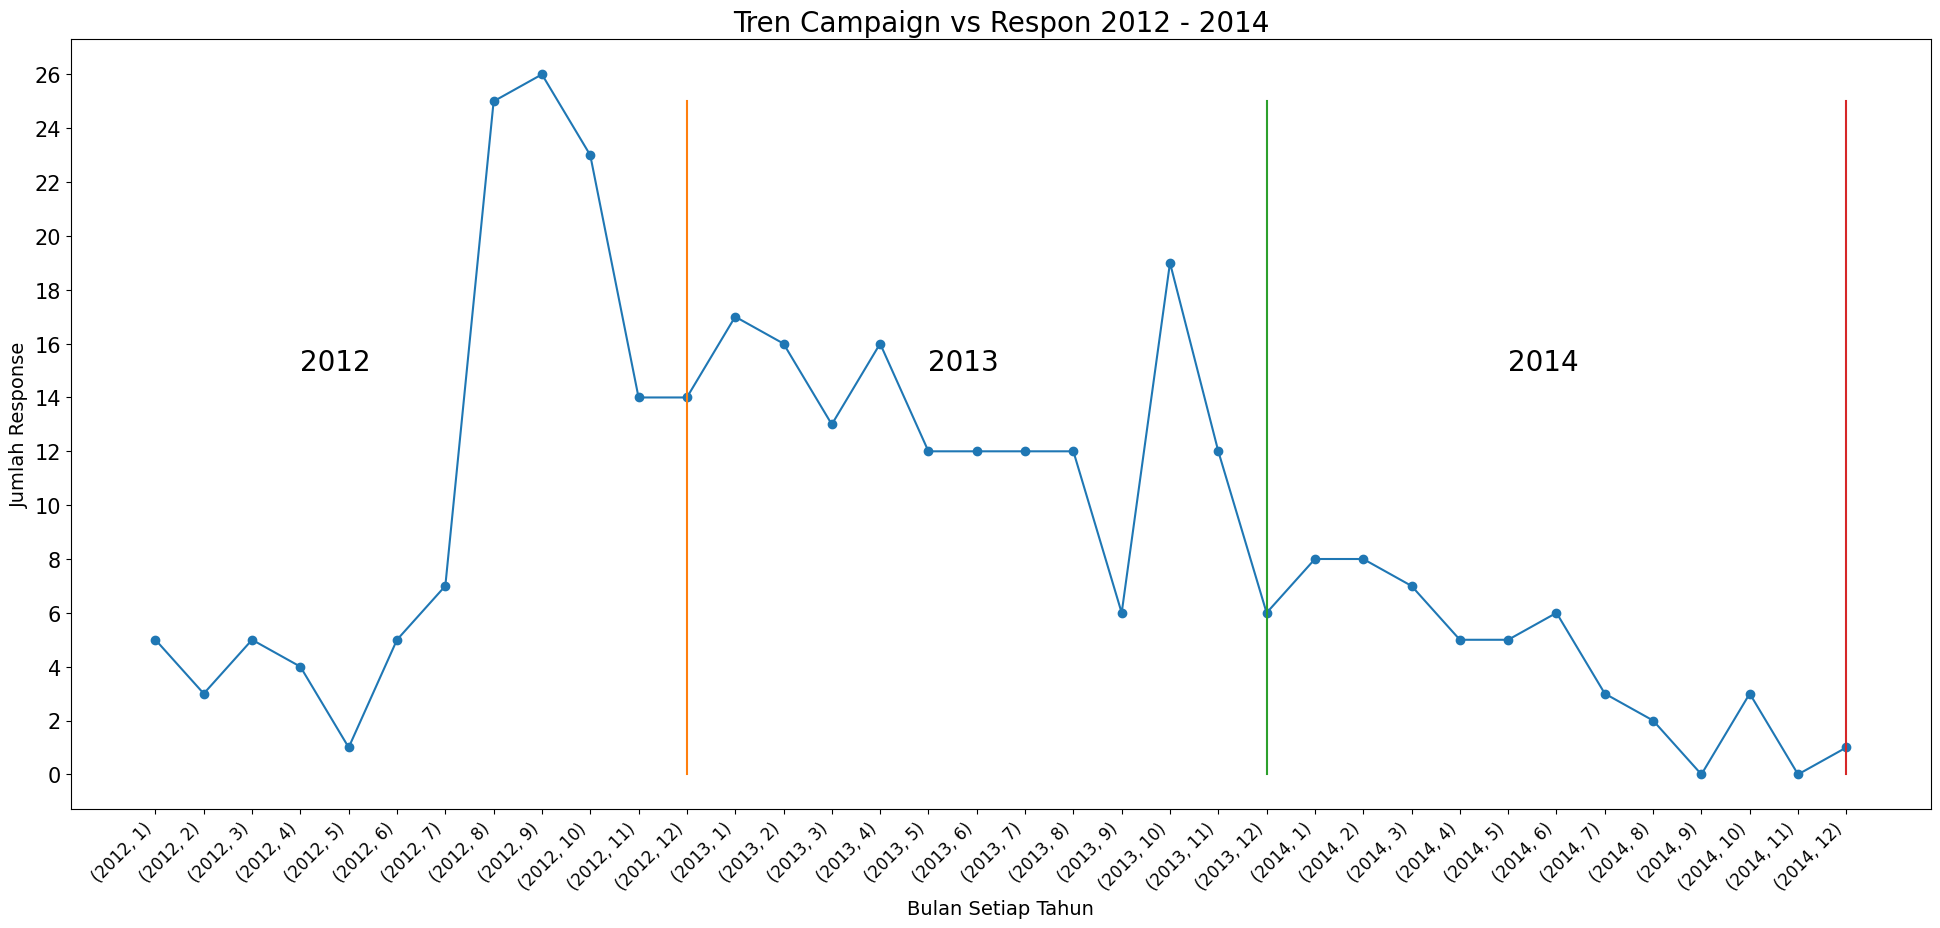

In [36]:
plt.figure(figsize=(24,10))
plt.plot(trend_df.reset_index()['Response'], 'o-')
plt.plot([11,11], [0,25])
plt.plot([23,23], [0,25])
plt.plot([35,35], [0,25])
plt.text(3,15,'2012',size=20)
plt.text(16,15,'2013',size=20)
plt.text(28,15,'2014',size=20)
plt.xticks(np.arange(0,36), trend_x.index, rotation=45,ha="right",size=12)
plt.yticks(np.arange(0,28,2),size=15)
plt.xlabel('Bulan Setiap Tahun',size=14)
plt.ylabel('Jumlah Response',size=14)
plt.title('Tren Campaign vs Respon 2012 - 2014',size=20)
plt.show()

**Insight**
1. Dari grafik diatas dapat dilihat bahwa terdapat fluktuatif dari trend line jumlah yang respon setiap tahunnya. Dengan dibedahnya trend yang respon dari tahun 2012 - 2014 jika bisa melihat bahwa terjadi penurunan trend di akhir tahun 2014 dari yang memiliki kenaikan di tahun 2013 lalu drop di tahun berikutnya.

**Analisis** 
1. Setelah dilakukan pengecekan lebih mendalam terdapat penurunan drastis yang terjadi di tahun 2014 dikarena mayoritas dari yang tidak merespon adalah customer yang sudah registrasi lebih dari 1 bulan, lebih dari 2 bulan dan tidak ada yang respon camp yang terakhir registrasinya lebih dari 3 bulan.<p>
![pivot excel](./picture/1.png) 

**Rekomendasi**
1. Karena kesadaran yang cepat akan penurunan trend di akhir tahun terakhir ini, agar tidak terjadi hal yang sama di tahun berikutnya atau di tahun sedang di analisis saat ini akan disediakan camp yang menarik dari tahun sebelumnya dan menarik minat kembali customer yang selisih registrasinya lebih dari 2 bulan & 3 bulan keatas.

#### **2. Generasi mana yang paling tinggi merespon Camp yang diterima**

In [37]:
Generation_Types = df[['Generation_Types','Total_Campaign','Response']].groupby('Generation_Types').sum('Total_Campaign').reset_index()


In [38]:
Generation_Types['No_Respon'] = Generation_Types['Total_Campaign'] - Generation_Types['Response']
Generation_Types[['Generation_Types','Total_Campaign','No_Respon','Response']]

,Generation_Types,Total_Campaign,No_Respon,Response
0,Baby boomer,239,130,109
1,Gen X,264,119,145
2,Milenial,148,72,76
3,Pre-boomer,10,7,3


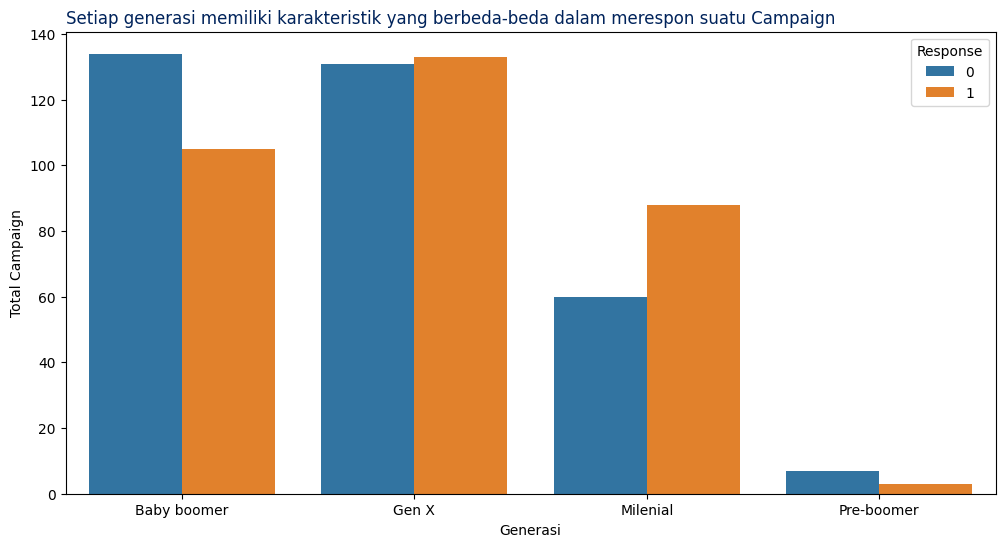

In [39]:
plt.figure(figsize=(12,6))
plt.title('Setiap generasi memiliki karakteristik yang berbeda-beda dalam merespon suatu Campaign', 
          loc='left', fontsize=12, 
          color='#00235B')
sns.barplot(x='Generation_Types',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.xlabel('Generasi')
plt.ylabel('Total Campaign')
plt.show()

**Insight**
1. Grafik diatas menunjukan bahwa setiap golongan memiliki kesadaran merespon yang berbeda-beda terlihat dari grafis diatas dan untuk perincian kesadarannya, ada di bawah ini:
- Dari yang paling tua adalah **Pre-boomer** : kami memaklumi kurangnya merespon dari generasi ini karena memang umurnya yang sudah jauh
- **Baby boomer** : dilanjut dengan generasi ini masih memiliki persentasi yang respon lebih kecil dari total camp yang diterima
- **Gen X** : dari generasi ini selisih banyaknya menerima camp dengan ngerespon lebih sedikit dari generasi sebelumnya terlihat dari gravis diatas
- **Milenial** : generasi yang lebih mudah dari generasi sebelumnya adalah Milenial karena mudanya umur kesadaran akan merespon camp yang diterima lebih tinggi dari sebelumnya. 

**Analisis** 
<p> Pertanyaan ini berfokus pada karakteristik dari generasi ke generasi tentang respon yang mereka berikan terkait dengan campg yang diterima semakin muda umurnya semakin merespon suatu campg, dengan begitu kita bisa lihat setiap generasi memiliki karakteristik seperti apa berdasarkan:<p>

- **Pre-boomer** : kami memaklumi kurangnya merespon dari generasi ini karena memang umurnya yang sudah jauh dan bukan menjadi target kami selanjutnya dalam kampanye
- **Baby boomer** : memiliki beberapa karakteristik Menghargai pengalaman, lebih konservatif, Fokus pada kualitas, mempertimbangkan nilai, menghargai interaksi sosial dari beberapa karakteristik berikut terdapat rencana strategi untuk berikutnya 
- **Gen X** : karena selisih respon dan total camp yang diterima dari generasi ini tidak terlalu tinggi maka dari itu kita akan coba fokus ke generasi Baby boomer untuk menjadi tolak ukur keberhasilan suatu produk untuk generasi selanjutnya
- **Milenial** : campg sukses untuk generasi ini

**Rekomendasi**
1. tolak ukur dari grafis ini adalah **Baby boomer** dengan karakternya, karena Pre-boomer sudah tidak memungkinkan lagi jika dilihat dari umurnya dan campg di tahun berikutnya. akan dibuatkan camp baru di tahun berikutnya dengan mengikuti karakteristik **Baby boomer** dan jika sukses akan mempengaruhi generasi berikutnya.

#### **3. Siapa aja yang merespon Campg dari Status pernikahan**

In [40]:
MarStats = df[['Marital_Status']].value_counts()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2215 non-null   object        
 1   Marital_Status       2215 non-null   object        
 2   Income               2215 non-null   float64       
 3   Kidhome              2215 non-null   int64         
 4   Teenhome             2215 non-null   int64         
 5   Dt_Customer          2215 non-null   datetime64[ns]
 6   Recency              2215 non-null   int64         
 7   MntWines             2215 non-null   int64         
 8   MntFruits            2215 non-null   int64         
 9   MntMeatProducts      2215 non-null   int64         
 10  MntFishProducts      2215 non-null   int64         
 11  MntSweetProducts     2215 non-null   int64         
 12  MntGoldProds         2215 non-null   int64         
 13  NumDealsPurchases    2215 non-nul

In [42]:
# # Mengubah Variable Marital_Status menjadi 2 kategori, yaitu 'In Relationship', 'Single'
# df['Marital_Status'] = df['Marital_Status'].replace({
#     'Married':'In Relationship',
#     'Together':'In Relationship',
#     'Single':'Single',
#     'Divorced':'Single',
#     'Widow':'Single',
#     'Alone':'Single',
#     'Absurd':'Single',
#     'YOLO':'Single',
# })

# df['Marital_Status'].value_counts()

<Axes: xlabel='Marital_Status', ylabel='count'>

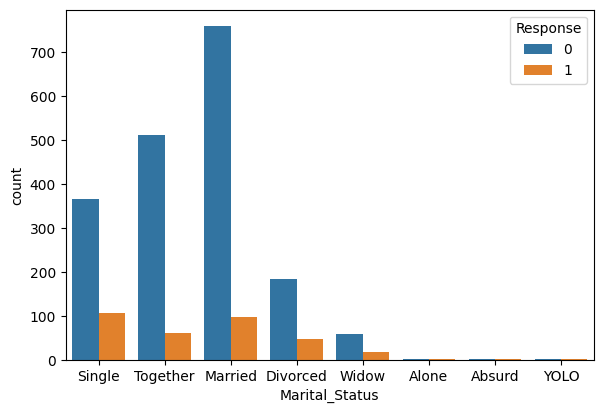

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(data=df,x='Marital_Status',
              hue='Response')

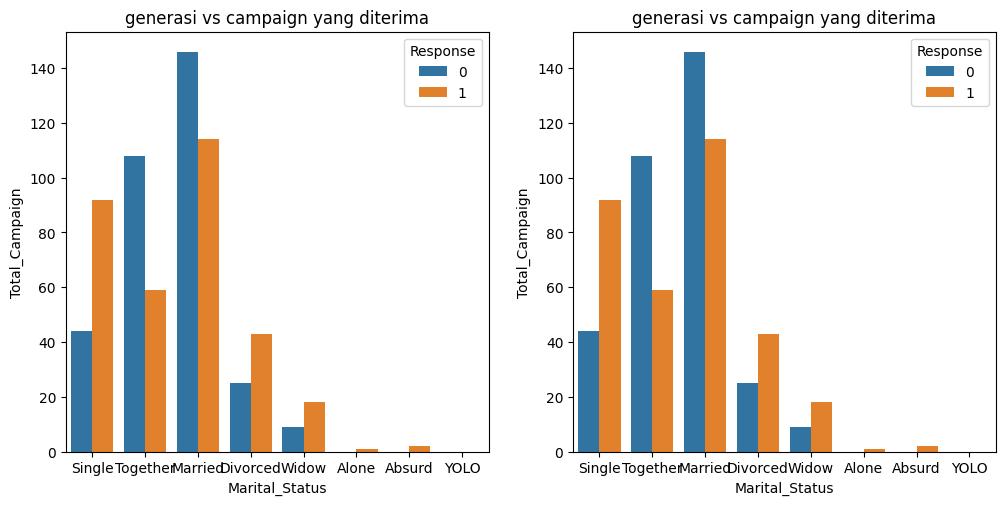

In [44]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Marital_Status',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.subplot(2,2,2)
plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Marital_Status',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

In [45]:
camp_selection = df[df['Total_Campaign'] != 0]
camp_selection.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending,Year,Month
9,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,...,2015-02-02,65,Baby boomer,Lower Middle Class,90 Days,1,2,49,2014,3
15,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,...,2015-02-02,69,Baby boomer,Upper Middle Class,30 Days,2,26,1315,2012,11


In [46]:
camp_selection['Marital_Status'] = camp_selection['Marital_Status'].replace({
    'Married':'In Relationship',
    'Together':'In Relationship',
    'Single':'Single',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single',
})

camp_selection['Marital_Status'].value_counts()

In Relationship    296
Single             163
Name: Marital_Status, dtype: int64

In [47]:
ms_asc = df[['Marital_Status','Total_Campaign','Response']].groupby(by=['Marital_Status','Response']).sum('Total_Campaign').loc[['Married','Together','Single','Divorced','Widow','Absurd','Alone','YOLO']].reset_index()
ms_asc

,Marital_Status,Response,Total_Campaign
0,Married,0,146
1,Married,1,114
2,Together,0,108
3,Together,1,59
4,Single,0,44
5,Single,1,92
6,Divorced,0,25
7,Divorced,1,43
8,Widow,0,9
9,Widow,1,18


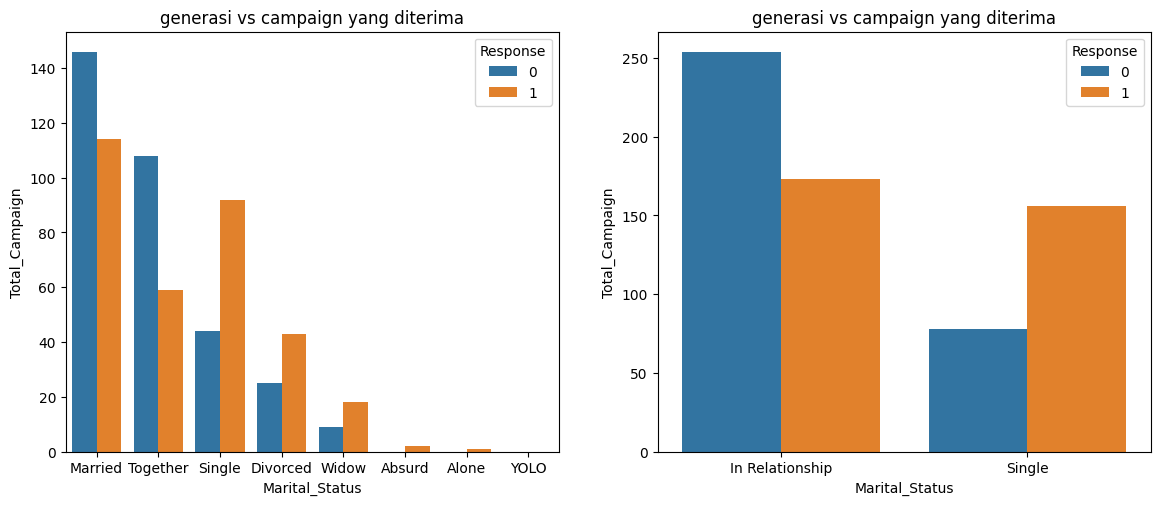

In [48]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Marital_Status',y='Total_Campaign',
            data=ms_asc, hue='Response',
            ci=None,
            estimator=np.sum)
plt.subplot(2,2,2)
plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Marital_Status',y='Total_Campaign',
            data=camp_selection, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

In [49]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending,Year,Month
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617,2012,4
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27,2014,8


Sebelum kita melihat lebih dalam terkait insight dan analisa setelah itu rekomendasi, mari kita pahami pengertian dari keterangan-keterangan berikut untuk bahan memahami insightnya lebih dalam.
- Absurd : Suatu status pernikahan yang tidak dapat di definisikan atau tidak masuk akal dan ini didefinisikan hidup sendiri
- Alone adalah istilah yang menggambarkan kondisi seseorang yang berada dalam keadaan sendirian atau terisolasi dari interaksi sosial
dengan orang lain.
- Divorced : adalah istilah yang digunakan untuk menggambarkan status seseorang yang telah mengakhiri pernikahannya secara resmi melalui proses hukum yang disebut sebagai perceraian atau cerai. 
- Married : Married adalah istilah yang digunakan untuk menggambarkan status seseorang yang telah menikah secara resmi.
- Single : Single adalah istilah yang digunakan untuk menggambarkan status seseorang yang tidak menikah atau tidak memiliki pasangan saat ini.
- Together : adalah kata yang memiliki arti "bersama-sama". Istilah ini dapat digunakan dalam berbagai konteks, termasuk dalam hubungan romantis, persahabatan, keluarga, atau dalam lingkup pekerjaan dan bisnis.
- Widow : status mengacu pada status seseorang yang telah kehilangan pasangan hidupnya karena meninggal dunia dan tidak menikah lagi setelah itu.
- YOLO : singkatan dari frase "You Only Live Once", yang berarti "Kamu Hidup Hanya Sekali".

**Insight**
<P>Terlihat dari grafis diatas bahwa ada 9 status pernikahan sesuai dengan keterangan diatas dan kalo dilihat bahwa yang tidak merespon sebuah campaign kebanyak yang sudah memiliki pasangan, dengan angka paling tinggi adalah status Married, diikuti dengan together. dan berurut untuk yang golongan tidak memiliki pasangan paling tinggi adalah Single, dikuti dengan urutan kedua adalah Divorced, ketiga Widow untuk sisanya tidak terlihat<P>

**Analisis** 
<p>Dari grafis diatas kita bisa analisa bahwa yang memiliki pasangan lebih banyak yang tidak ngerespon campg dari yang statusnya Married & together terdapat beberapa kemungkinan dari yang tidak memiliki pasangan diantaranya mungkin karena yang melakukan pembelian itu pasangannya dan tidak merespon atau juga yang statusnya sudah memiliki pasangan dan juga anak memiliki kesibukan karena memang sudah memiliki anggota keluarga yang perlu diurus maka dari itu tidak terespon untuk campg tersebut.

**Rekomendasi**
<p>Yang sudah kita tahu bahwa untuk persebaran data angka customer yang paling banyak ada di angka yang sudah memiliki pasangan entah itu secara resmi dan hanya tinggal bersama maka dari itu, kita untuk rekomendasi berikutnya kita perlu memastikan bahwa campg yang diterima yaitu seseorang yang sesuai dengan idnya bukan orang lain tapi anggota keluarganya.<p>

#### **4. Dari Income mana saja yang menerima camp dan melakukan respon atau tidak**

In [55]:
camp_selection['Income_Status'].unique()

array(['Lower Middle Class', 'Upper Middle Class', 'Middle', 'Rich'],
      dtype=object)

In [57]:
income_status = df[['Income_Status','Total_Campaign','Response']].groupby(by=['Income_Status','Response']).sum('Total_Campaign').loc[['Upper Middle Class','Middle','Lower Middle Class','Rich']].reset_index()
income_status

,Income_Status,Response,Total_Campaign
0,Upper Middle Class,0,171
1,Upper Middle Class,1,217
2,Middle,0,98
3,Middle,1,50
4,Lower Middle Class,0,63
5,Lower Middle Class,1,50
6,Rich,0,0
7,Rich,1,12


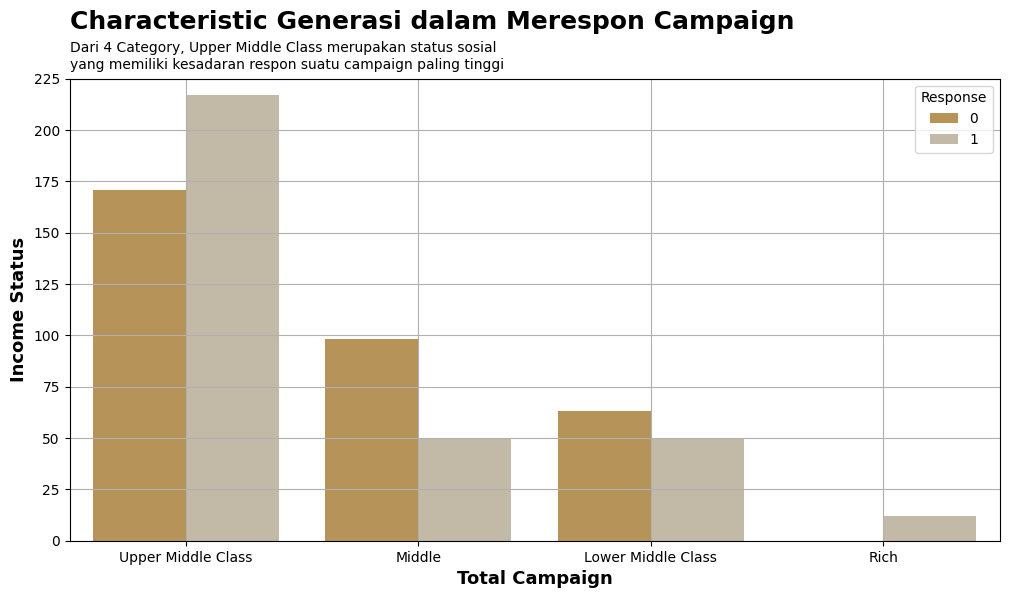

In [90]:
clr = ["#C69749", "#C7BCA1"]
plt.figure(figsize=(12,6))
# plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Income_Status',y='Total_Campaign', palette=clr,
            data=income_status, hue='Response',
            ci=None,
            estimator=np.sum)
plt.ylabel("Income Status", fontweight = "bold", size = 13)
plt.xlabel("Total Campaign", fontweight = "bold", size = 13)
plt.grid(True)
plt.ylim([0,225])
plt.title("Characteristic Generasi dalam Merespon Campaign", size = 18, fontweight = "bold", y =1.09, loc='left')
plt.text(s = "Dari 4 Category, Upper Middle Class merupakan status sosial\nyang memiliki kesadaran respon suatu campaign paling tinggi",
         x = -0.5, y = 230, ha = "left")
plt.show()

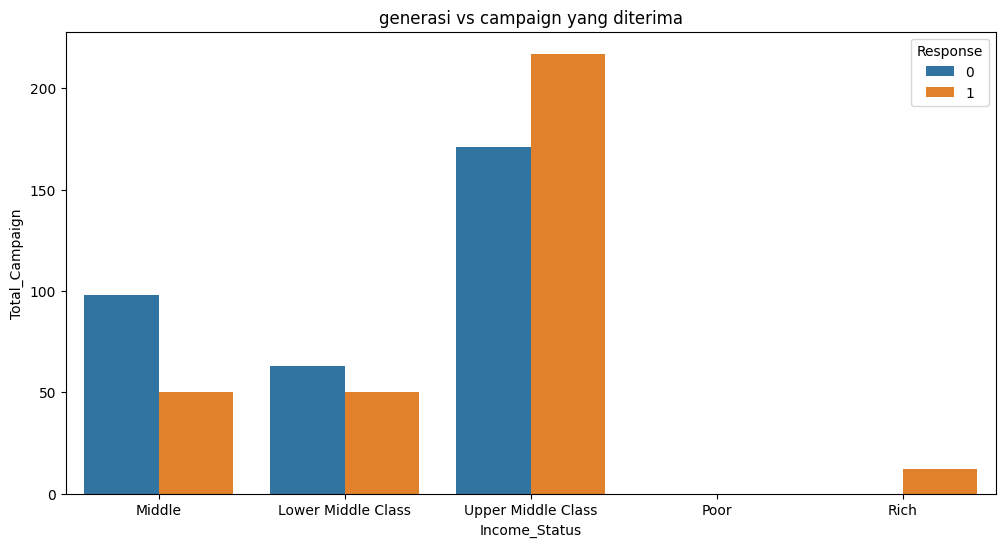

In [53]:
plt.figure(figsize=(12,6))
plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Income_Status',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

#### **5. Dari yang memiliki Education apa yang menerima camp dan melakukan respon atau tidak**

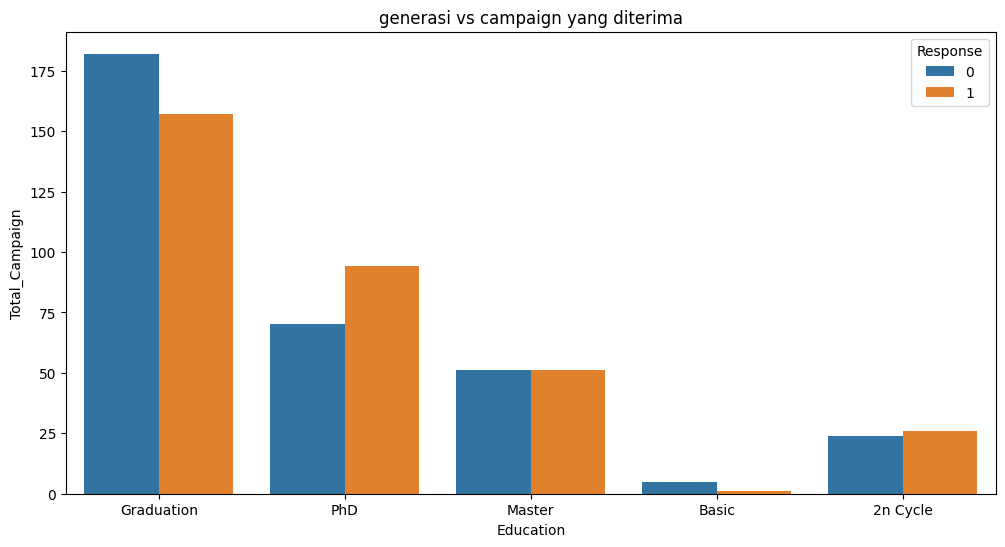

In [51]:
plt.figure(figsize=(12,6))
plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Education',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

insight tambahan
dari total customer 2215 hanya 459 yang di kasih campg itu hanya 29,84, itu kenapa setengahnya

memiliki potensi cust besar yang tidak menerima camp